# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-07-22 13:50:56.169353


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/21/20


,7/21/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,3899211,141995,3.64
Brazil,2159654,81487,3.77
United Kingdom,297389,45507,15.30
Mexico,356255,40400,11.34
Italy,244752,35073,14.33
France,214607,30168,14.06
India,1193078,28732,2.41


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 7/21/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
31483,US,3773260,2020-07-19,140534.0,415.0,61847.0,66902.571429
31482,US,3711413,2020-07-18,140119.0,853.0,63698.0,66498.285714
31481,US,3647715,2020-07-17,139266.0,908.0,71558.0,65996.857143
31480,US,3576157,2020-07-16,138358.0,943.0,77255.0,65458.714286
31479,US,3498902,2020-07-15,137415.0,949.0,67328.0,63457.571429
31478,US,3431574,2020-07-14,136466.0,900.0,67417.0,62210.857143
31477,US,3364157,2020-07-13,135566.0,361.0,59215.0,61154.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 7/21/20


,7/21/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,408181,32520.0,7.97
New Jersey,177256,15737.0,8.88
Massachusetts,114033,8450.0,7.41
California,409305,7888.0,1.93
Illinois,164864,7517.0,4.56
Pennsylvania,107460,7051.0,6.56
Michigan,83059,6382.0,7.68


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 7/21/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1089,California,386906,2020-07-19,7715.0,13.0,6161.0,8909.000000
1088,California,380745,2020-07-18,7702.0,99.0,7486.0,8854.857143
1087,California,373259,2020-07-17,7603.0,114.0,8553.0,8910.571429
1086,California,364706,2020-07-16,7489.0,114.0,9821.0,8888.857143
1085,California,354885,2020-07-15,7375.0,125.0,8674.0,8903.571429
1084,California,346211,2020-07-14,7250.0,161.0,12854.0,8885.571429
1083,California,333357,2020-07-13,7089.0,38.0,8814.0,8903.142857


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' COVID-19 cases by county as of', mostrecentdatecases)
casessummary



Number of confirmed California COVID-19 cases by county as of 7/21/20


,7/21/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,162025,4155.0,2.56
Riverside,30890,589.0,1.91
Orange,30976,513.0,1.66
San Diego,24520,487.0,1.99
San Bernardino,25067,333.0,1.33
Santa Clara,8046,178.0,2.21
Tulare,7120,168.0,2.36


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 7/21/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3455,Los Angeles,155917,2020-07-19,4096.0,12.0,2765.0,3195.428571
3454,Los Angeles,153152,2020-07-18,4084.0,36.0,2728.0,3251.142857
3453,Los Angeles,150424,2020-07-17,4048.0,59.0,2746.0,3283.571429
3452,Los Angeles,147678,2020-07-16,3989.0,46.0,4471.0,3240.857143
3451,Los Angeles,143207,2020-07-15,3943.0,46.0,2631.0,2850.142857
3450,Los Angeles,140576,2020-07-14,3897.0,73.0,4219.0,2830.285714
3449,Los Angeles,136357,2020-07-13,3824.0,15.0,2808.0,2826.714286
3448,Los Angeles,133549,2020-07-12,3809.0,14.0,3155.0,2646.428571
3447,Los Angeles,130394,2020-07-11,3795.0,51.0,2955.0,3224.000000
3446,Los Angeles,127439,2020-07-10,3744.0,54.0,2447.0,2804.714286



7 day new US cases as of 7/21/20


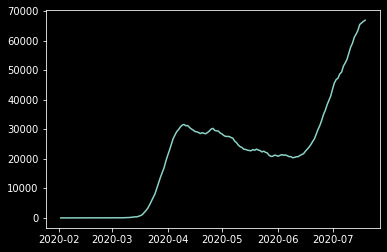

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 7/21/20


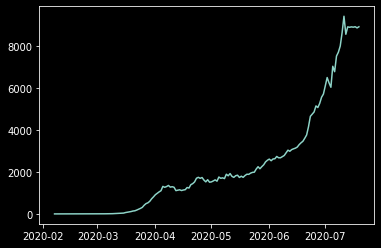

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 7/21/20


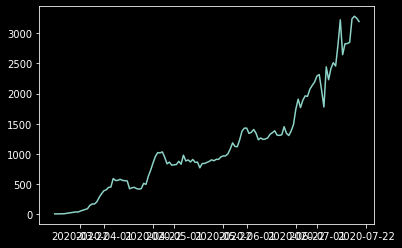

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.plot(countyDataTA["Rolling7Average"])

plt.show()